<a href="https://colab.research.google.com/github/Muntasir2179/Face-Mask-Detection/blob/main/Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Configuring the path of Kaggle.json file

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:08<00:00, 24.8MB/s]
100% 163M/163M [00:08<00:00, 20.4MB/s]


In [6]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# command to show directory folders
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


# Importing the Libraries

In [10]:
# dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print('The number of images with mask on: ',len(with_mask_files))
print('These are some sample image name given below as a list:')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

The number of images with mask on:  3725
These are some sample image name given below as a list:
['with_mask_1378.jpg', 'with_mask_1114.jpg', 'with_mask_3670.jpg', 'with_mask_2.jpg', 'with_mask_3264.jpg']
['with_mask_306.jpg', 'with_mask_801.jpg', 'with_mask_1251.jpg', 'with_mask_408.jpg', 'with_mask_1068.jpg']


In [15]:
without_mask_files = os.listdir('/content/data/without_mask')
print('The number of images with mask off: ',len(without_mask_files))
print('These are some sample image name given below as a list:')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

The number of images with mask off:  3828
These are some sample image name given below as a list:
['without_mask_2949.jpg', 'without_mask_989.jpg', 'without_mask_1616.jpg', 'without_mask_2144.jpg', 'without_mask_3694.jpg']
['without_mask_490.jpg', 'without_mask_749.jpg', 'without_mask_2719.jpg', 'without_mask_2065.jpg', 'without_mask_1845.jpg']


# Creating Labels for the two class of images

In [16]:
# with mask     -->  1
# without mask  -->  0

with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [17]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [20]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# Displaying the Image

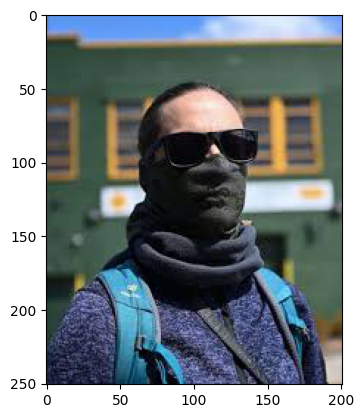

In [22]:
with_mask_img = mpimg.imread('/content/data/with_mask/with_mask_2.jpg')
imgplot = plt.imshow(with_mask_img)
plt.show()

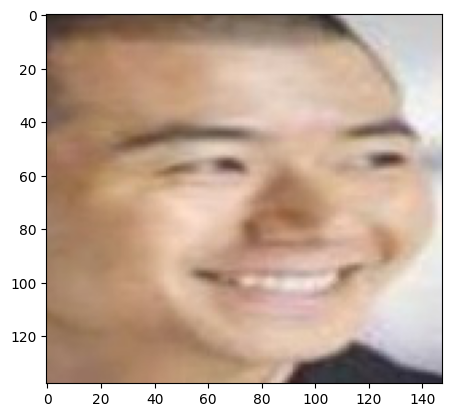

In [23]:
without_mask_img = mpimg.imread('/content/data/without_mask/without_mask_2.jpg')
imgplot = plt.imshow(without_mask_img)
plt.show()

# Image Processing

In [24]:
# convert images to numpy arrays in order to get the pixel values

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
type(data)

list

In [26]:
len(data)

7553

In [27]:
# will show the pixel value
data[0]

array([[[251, 255, 251],
        [253, 255, 255],
        [255, 254, 255],
        ...,
        [128, 117, 115],
        [128, 117, 115],
        [128, 117, 115]],

       [[252, 255, 253],
        [254, 255, 255],
        [255, 255, 255],
        ...,
        [126, 115, 113],
        [127, 116, 114],
        [127, 116, 114]],

       [[253, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [126, 115, 112],
        [125, 114, 112],
        [123, 112, 110]],

       ...,

       [[255, 255, 252],
        [255, 253, 254],
        [255, 253, 252],
        ...,
        [118, 108, 230],
        [129, 118, 239],
        [144, 133, 252]],

       [[255, 255, 252],
        [255, 253, 254],
        [255, 253, 252],
        ...,
        [109,  99, 221],
        [121, 110, 230],
        [137, 126, 246]],

       [[255, 255, 252],
        [255, 253, 251],
        [255, 253, 252],
        ...,
        [106,  97, 214],
        [116, 105, 222],
        [130, 120, 237]]

In [28]:
type(data[0])

numpy.ndarray

In [29]:
data[0].shape

(128, 128, 3)

In [30]:
# converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

In [31]:
type(x)

numpy.ndarray

In [32]:
type(y)

numpy.ndarray

In [33]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [34]:
print(y)

[1 1 1 ... 0 0 0]


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [36]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [38]:
# scaling the data to represent the pixel values in the range of 0 to 1

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [39]:
x_train[0]

array([[[ 41,  51,  53],
        [ 41,  51,  53],
        [ 41,  50,  55],
        ...,
        [ 43,  46,  52],
        [ 48,  51,  56],
        [ 50,  53,  58]],

       [[ 41,  51,  53],
        [ 41,  51,  53],
        [ 41,  50,  55],
        ...,
        [ 46,  49,  54],
        [ 48,  51,  56],
        [ 50,  53,  57]],

       [[ 41,  51,  53],
        [ 41,  51,  53],
        [ 40,  50,  54],
        ...,
        [ 51,  54,  59],
        [ 49,  52,  57],
        [ 49,  52,  57]],

       ...,

       [[104,  88,  79],
        [ 92,  79,  71],
        [ 68,  60,  54],
        ...,
        [178, 192, 202],
        [178, 192, 202],
        [178, 192, 202]],

       [[168, 149, 138],
        [141, 125, 115],
        [ 84,  74,  67],
        ...,
        [172, 187, 198],
        [173, 187, 198],
        [173, 187, 198]],

       [[208, 190, 180],
        [172, 157, 148],
        [ 95,  87,  80],
        ...,
        [170, 184, 195],
        [170, 184, 195],
        [170, 184, 195]]

In [40]:
x_train_scaled[0]

array([[[0.16078431, 0.2       , 0.20784314],
        [0.16078431, 0.2       , 0.20784314],
        [0.16078431, 0.19607843, 0.21568627],
        ...,
        [0.16862745, 0.18039216, 0.20392157],
        [0.18823529, 0.2       , 0.21960784],
        [0.19607843, 0.20784314, 0.22745098]],

       [[0.16078431, 0.2       , 0.20784314],
        [0.16078431, 0.2       , 0.20784314],
        [0.16078431, 0.19607843, 0.21568627],
        ...,
        [0.18039216, 0.19215686, 0.21176471],
        [0.18823529, 0.2       , 0.21960784],
        [0.19607843, 0.20784314, 0.22352941]],

       [[0.16078431, 0.2       , 0.20784314],
        [0.16078431, 0.2       , 0.20784314],
        [0.15686275, 0.19607843, 0.21176471],
        ...,
        [0.2       , 0.21176471, 0.23137255],
        [0.19215686, 0.20392157, 0.22352941],
        [0.19215686, 0.20392157, 0.22352941]],

       ...,

       [[0.40784314, 0.34509804, 0.30980392],
        [0.36078431, 0.30980392, 0.27843137],
        [0.26666667, 0